<a href="https://colab.research.google.com/github/Nusnan-AM/JARTEST_models/blob/main/EDA_Jartest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Load the Data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
 20180501_174635.jpg
 20180501_174733.jpg
 20180501_174736.jpg
 application-aptitude-2020.pdf
'Asrin 12.gdoc'
 catboost_info
'Colab Notebooks'
'Contact '
'Contact Information.gform'
'CST20083  AM.NUSNAN.mp4'
'CST382-3_1_Introduction (1).gslides'
'CST382-3_2_Sampling and Quantization.gslides'
'CST WAD  Group - C.gdoc'
'Design Documentation on Boarding Project.gdoc'
'Document from Serial Ghost'
 DSC_0004.JPG
 DSC_0087.JPG
 DSC_0089.JPG
 DSC_0096.JPG
 DSC_0100.JPG
 DSC_0105.JPG
 DSC_0106.JPG
 DSC_0107.JPG
 DSC_0109.JPG
 DSC_0110_1.JPG
 DSC_0111_1.JPG
 DSC_0113.JPG
 DSC_0114_1.JPG
 DSC_0114.JPG
 DSC_0115.JPG
 DSC_0116_1.JPG
 DSC_0117.JPG
 DSC_0119.JPG
 DSC_0124.JPG
 DSC_0125_1.JPG
 DSC_0127.JPG
 DSC_0128.JPG
 DSC_0129.JPG
 DSC_0130.JPG
 DSC_0131.JPG
 DSC_0140.JPG
 DSC_0143_1.JPG
 DSC_0146_1.JPG
 DSC_0147_1.JPG
 DSC_0148_1.JPG
 DSC_0148_2.JPG
 DSC_0149_1.JPG
 DSC_0150_1.JPG
 DSC_0152_1.JPG
 DSC_0154.JPG
 DSC_0156.JPG
 DSC_0157.JPG
 DSC_0158.JPG
 DSC_0160.JPG
 DSC_

In [ ]:
%cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


In [ ]:
data = pd.read_csv("jartest.csv")

# EDA

In [ ]:
data.head()

,Date,Raw_Turbidity,Raw_PH,Raw_Colour,PAC,KMnO4,ACD,Turbidity,PH,Colour
0,31/12/2019,90.4,7.07,500.0,2.5,0.4,0.5,19.0,7.07,48.0
1,31/12/2019,90.4,7.07,500.0,3.0,0.4,0.5,14.2,7.05,39.0
2,31/12/2019,90.4,7.07,500.0,3.5,0.4,0.5,12.6,7.02,31.0
3,31/12/2019,90.4,7.07,500.0,4.0,0.4,0.5,10.6,6.98,27.0
4,31/12/2019,90.4,7.07,500.0,4.5,0.4,0.5,10.7,6.93,29.0


In [ ]:
data.columns

Index(['Date', 'Raw_Turbidity', 'Raw_PH', 'Raw_Colour', 'PAC', 'KMnO4', 'ACD',
       'Turbidity', 'PH', 'Colour'],
      dtype='object')

In [ ]:
data = data.drop(columns=['Date'])

In [ ]:
data.head()

,Raw_Turbidity,Raw_PH,Raw_Colour,PAC,KMnO4,ACD,Turbidity,PH,Colour
0,90.4,7.07,500.0,2.5,0.4,0.5,19.0,7.07,48.0
1,90.4,7.07,500.0,3.0,0.4,0.5,14.2,7.05,39.0
2,90.4,7.07,500.0,3.5,0.4,0.5,12.6,7.02,31.0
3,90.4,7.07,500.0,4.0,0.4,0.5,10.6,6.98,27.0
4,90.4,7.07,500.0,4.5,0.4,0.5,10.7,6.93,29.0


In [ ]:
# Generate detailed statistics
summary_stats = data.describe()

# Display results
print(summary_stats)


       Raw_Turbidity       Raw_PH   Raw_Colour          PAC        KMnO4  \
count    5105.000000  5105.000000  5105.000000  5105.000000  5105.000000   
mean       82.027855     7.096131   337.219354     3.221009     0.355330   
std        99.211957     0.394417   141.090457     1.476141     0.192874   
min         2.100000     6.190000    20.000000     0.100000     0.080000   
25%        24.600000     6.810000   195.000000     2.000000     0.180000   
50%        43.500000     7.000000   328.000000     3.000000     0.350000   
75%        89.600000     7.470000   500.000000     4.500000     0.500000   
max       500.000000     8.990000   500.000000     8.500000     0.950000   

               ACD    Turbidity           PH       Colour  
count  5105.000000  5105.000000  5105.000000  5105.000000  
mean      0.398985    16.290950     7.126390    43.845910  
std       0.266137    11.703517     0.321125    42.565336  
min       0.100000     0.430000     6.150000     8.000000  
25%       0.250

In [ ]:
# Function to display key statistics for a given column
def display_stats(column_name):
    print(f"--- {column_name} Statistics ---")
    print(f"Min: {data[column_name].min()}")
    print(f"Max: {data[column_name].max()}")
    print(f"Mean: {data[column_name].mean():.2f}")
    print(f"Median: {data[column_name].median():.2f}")
    print(f"Standard Deviation: {data[column_name].std():.2f}")
    print(f"Q1 (25th percentile): {data[column_name].quantile(0.25):.2f}")
    print(f"Q3 (75th percentile): {data[column_name].quantile(0.75):.2f}")
    print("\n")

# List of relevant columns
columns_to_analyze = ["Raw_Turbidity", "Raw_PH", "Raw_Colour", "PAC", "KMnO4", "ACD", "Turbidity", "PH", "Colour"]

# Display stats for each column
for col in columns_to_analyze:
    display_stats(col)


--- Raw_Turbidity Statistics ---
Min: 2.1
Max: 500.0
Mean: 82.03
Median: 43.50
Standard Deviation: 99.21
Q1 (25th percentile): 24.60
Q3 (75th percentile): 89.60


--- Raw_PH Statistics ---
Min: 6.19
Max: 8.99
Mean: 7.10
Median: 7.00
Standard Deviation: 0.39
Q1 (25th percentile): 6.81
Q3 (75th percentile): 7.47


--- Raw_Colour Statistics ---
Min: 20.0
Max: 500.0
Mean: 337.22
Median: 328.00
Standard Deviation: 141.09
Q1 (25th percentile): 195.00
Q3 (75th percentile): 500.00


--- PAC Statistics ---
Min: 0.1
Max: 8.5
Mean: 3.22
Median: 3.00
Standard Deviation: 1.48
Q1 (25th percentile): 2.00
Q3 (75th percentile): 4.50


--- KMnO4 Statistics ---
Min: 0.08
Max: 0.95
Mean: 0.36
Median: 0.35
Standard Deviation: 0.19
Q1 (25th percentile): 0.18
Q3 (75th percentile): 0.50


--- ACD Statistics ---
Min: 0.1
Max: 3.0
Mean: 0.40
Median: 0.35
Standard Deviation: 0.27
Q1 (25th percentile): 0.25
Q3 (75th percentile): 0.50


--- Turbidity Statistics ---
Min: 0.43
Max: 93.0
Mean: 16.29
Median: 13.80
Sta

In [ ]:
correlation_matrix = data.corr()

# Display the correlation matrix
print(correlation_matrix)

               Raw_Turbidity    Raw_PH  Raw_Colour       PAC     KMnO4  \
Raw_Turbidity       1.000000 -0.176354    0.527974  0.440664  0.254900   
Raw_PH             -0.176354  1.000000   -0.430541 -0.483605 -0.503340   
Raw_Colour          0.527974 -0.430541    1.000000  0.496400  0.426909   
PAC                 0.440664 -0.483605    0.496400  1.000000  0.419002   
KMnO4               0.254900 -0.503340    0.426909  0.419002  1.000000   
ACD                 0.187449 -0.226030    0.272406  0.213393  0.485047   
Turbidity           0.371088 -0.324247    0.387397  0.291872  0.313128   
PH                 -0.220335  0.773823   -0.441685 -0.477240 -0.533697   
Colour              0.060639  0.079258    0.091126 -0.098775  0.059369   

                    ACD  Turbidity        PH    Colour  
Raw_Turbidity  0.187449   0.371088 -0.220335  0.060639  
Raw_PH        -0.226030  -0.324247  0.773823  0.079258  
Raw_Colour     0.272406   0.387397 -0.441685  0.091126  
PAC            0.213393   0.291

In [ ]:
# Define specific feature correlations
selected_correlations = {
    "Raw Turbidity & Raw Colour": data["Raw_Turbidity"].corr(data["Raw_Colour"]),
    "Raw pH & Post-Treatment pH": data["Raw_PH"].corr(data["PH"]),
    "PAC & Raw Colour": data["PAC"].corr(data["Raw_Colour"]),
    "KMnO4 & PAC": data["KMnO4"].corr(data["PAC"]),
    "Turbidity & Colour": data["Turbidity"].corr(data["Colour"]),
}

# Print correlation insights
for key, value in selected_correlations.items():
    print(f"{key}: {value:.2f}")


Raw Turbidity & Raw Colour: 0.53
Raw pH & Post-Treatment pH: 0.77
PAC & Raw Colour: 0.50
KMnO4 & PAC: 0.42
Turbidity & Colour: 0.37


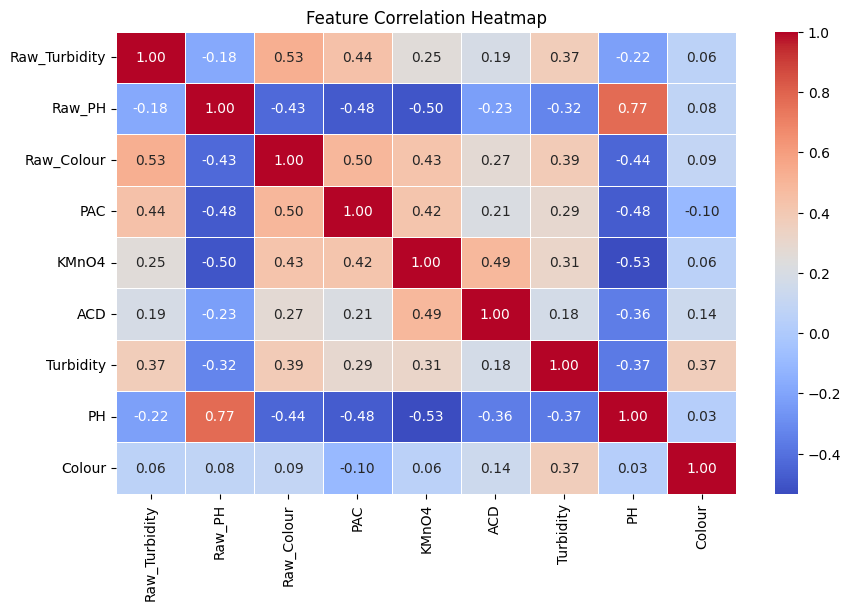

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
import numpy as np

# Set a correlation threshold (e.g., 0.5)
threshold = 0.5

# Identify feature pairs with high correlation
high_corr_features = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix != 1.0)]

# Display strong correlations
print(high_corr_features)


               Raw_Turbidity    Raw_PH  Raw_Colour  PAC     KMnO4  ACD  \
Raw_Turbidity            NaN       NaN    0.527974  NaN       NaN  NaN   
Raw_PH                   NaN       NaN         NaN  NaN -0.503340  NaN   
Raw_Colour          0.527974       NaN         NaN  NaN       NaN  NaN   
PAC                      NaN       NaN         NaN  NaN       NaN  NaN   
KMnO4                    NaN -0.503340         NaN  NaN       NaN  NaN   
ACD                      NaN       NaN         NaN  NaN       NaN  NaN   
Turbidity                NaN       NaN         NaN  NaN       NaN  NaN   
PH                       NaN  0.773823         NaN  NaN -0.533697  NaN   
Colour                   NaN       NaN         NaN  NaN       NaN  NaN   

               Turbidity        PH  Colour  
Raw_Turbidity        NaN       NaN     NaN  
Raw_PH               NaN  0.773823     NaN  
Raw_Colour           NaN       NaN     NaN  
PAC                  NaN       NaN     NaN  
KMnO4                NaN -0.533697

In [ ]:
# Define a set to keep track of dropped features
dropped_features = set()

for col in high_corr_features.columns:
    if any(high_corr_features[col].abs() > threshold):
        dropped_features.add(col)

# Remove redundant features
data_selected = data.drop(columns=dropped_features, errors='ignore')

print(f"Selected Features: {list(data_selected.columns)}")


Selected Features: ['PAC', 'ACD', 'Turbidity', 'Colour']


In [ ]:
# Correlation with Post-Treatment Turbidity
corr_turbidity = data.corr()["Turbidity"].drop("Turbidity").sort_values(ascending=False)
print("\nTop correlated features for Post-Treatment Turbidity:\n", corr_turbidity)

# Correlation with Post-Treatment pH
corr_ph = data.corr()["PH"].drop("PH").sort_values(ascending=False)
print("\nTop correlated features for Post-Treatment pH:\n", corr_ph)

# Correlation with Post-Treatment Colour
corr_colour = data.corr()["Colour"].drop("Colour").sort_values(ascending=False)
print("\nTop correlated features for Post-Treatment Colour:\n", corr_colour)



Top correlated features for Post-Treatment Turbidity:
 Raw_Colour       0.387397
Raw_Turbidity    0.371088
Colour           0.367077
KMnO4            0.313128
PAC              0.291872
ACD              0.177124
Raw_PH          -0.324247
PH              -0.367682
Name: Turbidity, dtype: float64

Top correlated features for Post-Treatment pH:
 Raw_PH           0.773823
Colour           0.032816
Raw_Turbidity   -0.220335
ACD             -0.357189
Turbidity       -0.367682
Raw_Colour      -0.441685
PAC             -0.477240
KMnO4           -0.533697
Name: PH, dtype: float64

Top correlated features for Post-Treatment Colour:
 Turbidity        0.367077
ACD              0.143162
Raw_Colour       0.091126
Raw_PH           0.079258
Raw_Turbidity    0.060639
KMnO4            0.059369
PH               0.032816
PAC             -0.098775
Name: Colour, dtype: float64
